#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import category_encoders as ce


%matplotlib inline
import warnings
from joblib import dump, load
warnings.filterwarnings("ignore")

In [2]:
# Load csv file
df = pd.read_csv('insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Data Preprocessing

In [3]:
# Count number of redundancy records in each class.

df[df.duplicated()].count()

age         1
sex         1
bmi         1
children    1
smoker      1
region      1
charges     1
dtype: int64

In [4]:
# Remove the duplicated records from the dataset.
df.drop_duplicates(inplace=True)

# check agin if there any duplicated value 
df[df.duplicated()].count()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Count number of missing value in each field.
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Apply One Hot encoding method to categories data ( Sex, Smoker, Region).

df_ = pd.get_dummies(data=df, columns=['sex','smoker','region'],drop_first=True)

# female = 0 male = 1
# smoker = 1 not smoker = 0
# southeast = 010 southwest = 001 northwest = 100

## III. Data Training and Modeling

> Determine the Features & Target Variable

In [7]:
X=df_.drop('charges', axis=1)

y=df_['charges']

> Split the Dataset to Train & Test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


### Train the Model using Linear Regression

> Train the Model using the X_train and y_train

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

> Coeficient Matrix

In [10]:
weights = lr.coef_
bias = lr.intercept_

print('We obtained the model parameters as follows:')
print('Weights: ', weights)
print('Bias: ', bias)

We obtained the model parameters as follows:
Weights:  [  248.21072022   318.70144095   533.0099888   -101.54205399
 23077.76459287  -391.76145478  -838.91961573  -659.13975155]
Bias:  -11092.652295945969


In [11]:
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

In [12]:
mse = metrics.mean_squared_error(y_test, y_test_pred)
mae = metrics.mean_absolute_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)

print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)

Mean squared error:  35478020.67523561
Mean absolute error:  4177.04556103632
R2 score:  0.8069287081198011


In [13]:
mse = metrics.mean_squared_error(y_train, y_train_pred)
mae = metrics.mean_absolute_error(y_train, y_train_pred)
r2 = metrics.r2_score(y_train, y_train_pred)

print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)

Mean squared error:  36979860.90472867
Mean absolute error:  4181.901537775141
R2 score:  0.7299057809339075


In [14]:
# show predicted and real profit
pd.DataFrame(list(zip(y_test_pred, y_test)), columns=['Predicted Charges', 'Real Charges'])

,Predicted Charges,Real Charges
0,8143.693884,8688.85885
1,5737.115683,5708.86700
2,14369.314876,11436.73815
3,31745.513636,38746.35510
4,8962.386657,4463.20510
...,...,...
263,16753.406458,13831.11520
264,15274.565769,13887.20400
265,6454.699355,3925.75820
266,38467.156720,47403.88000


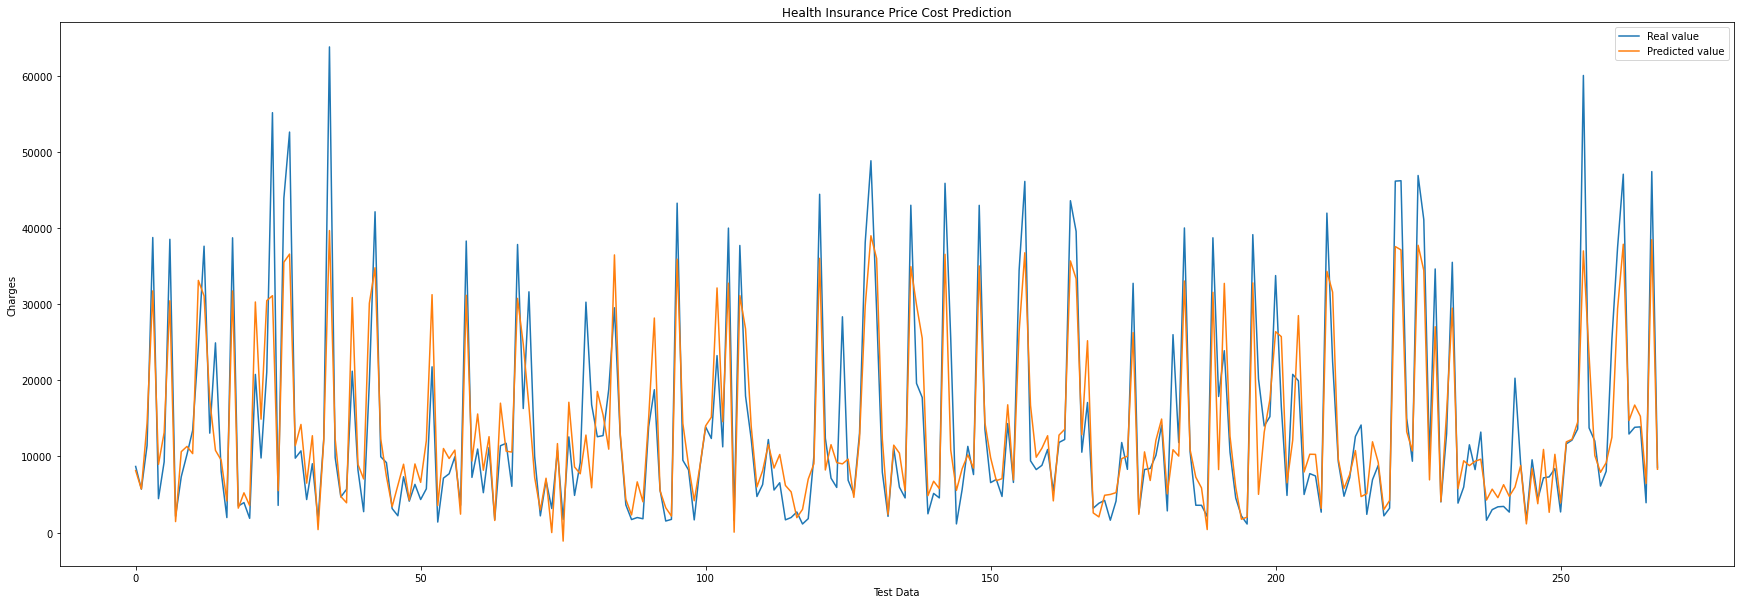

In [22]:
# visualize the predicted value with real value
plt.figure(figsize=(30, 10))

plt.plot(y_test.values, label='Real value')
plt.plot(y_test_pred, label='Predicted value')

plt.title('Health Insurance Price Cost Prediction')
plt.xlabel('Test Data')
plt.ylabel('Charges')
plt.legend()
plt.show()

## V. Prediction using the Model

In [16]:
#Save the Linear Regression model
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
dump(lr_model, 'lr_insurance.pkl')

['lr_insurance.pkl']

In [17]:
# Load the Model:
load_lr_model = load('lr_insurance.pkl')

> Predict Sample Data

In [18]:
df_.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [19]:
sample=[[28, 25.760, 0, 1, 0, 1, 0, 0]]

In [20]:
load_lr_model.predict(sample)

array([3573.6934805])